In [13]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/ISIMA/3A/anomalie_detection/data/UNSW_NB15_traintest_backdoor.csv", sep=',')

In [8]:
df

,dur,proto=udp,proto=arp,proto=tcp,proto=igmp,proto=ospf,proto=sctp,proto=gre,proto=ggp,proto=ip,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,class
0,0.000000,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.000000,0.016393,0,0
1,0.000000,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.000000,0.016393,0,0
2,0.000000,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.032258,0.0,0.0,0.000000,0.000000,0.032787,0,0
3,0.000000,1,0,0,0,0,0,0,0,0,...,0.022222,0.0,0.032258,0.0,0.0,0.000000,0.021739,0.032787,0,0
4,0.000000,1,0,0,0,0,0,0,0,0,...,0.022222,0.0,0.032258,0.0,0.0,0.000000,0.021739,0.032787,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95324,0.037920,0,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1
95325,0.000906,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1
95326,0.033548,0,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.062499,0.043478,0.000000,0,1
95327,0.016436,0,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1


One hot encoded vectors : protocol, service(http, smtp, ftp, ...), state.

In [9]:
label = df['class']
df = df.drop(['class'], axis=1)

In [11]:
# manual parameter
RATIO_TO_FRAUD = 15
RANDOM_SEED = 42

# dropping redundant columns
#df = df.drop(['time', 'amount'], axis=1)

# splitting by class
fraud = df.iloc[np.where(label == 1)[0], :]
clean = df.iloc[np.where(label == 0)[0], :]

# undersample clean transactions
clean_undersampled = clean.sample(
    int(len(fraud) * RATIO_TO_FRAUD),
    random_state=RANDOM_SEED
)

visualisation_initial = pd.concat([fraud, clean_undersampled])

visualisation_labels = visualisation_initial.iloc[:, -1]
visualisation_X = visualisation_initial.iloc[:, :visualisation_initial.shape[1] - 1]

In [12]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca').fit_transform(visualisation_X)

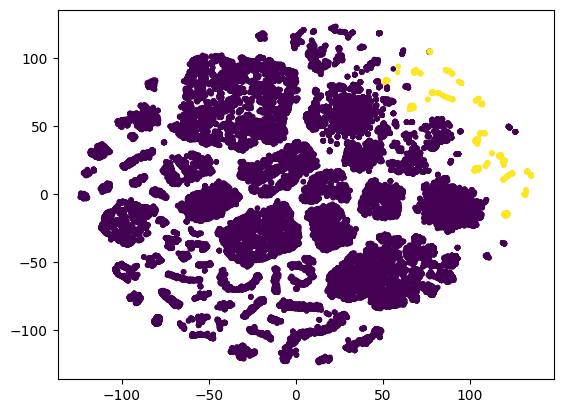

In [14]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=visualisation_labels, marker='.')

In [15]:
import pickle

In [16]:
# Serialize the object to a file
with open("/content/drive/Othercomputers/Mon ordinateur portable/ISIMA/3A/anomalie_detection/src/X_embedded_backdoor.pickle", "wb") as file:
    pickle.dump(X_embedded, file)

In [17]:
with open("/content/drive/Othercomputers/Mon ordinateur portable/ISIMA/3A/anomalie_detection/src/embedded_index_backdoor.pickle", "wb") as file:
    pickle.dump(visualisation_X.index, file)